# Data

In [125]:
from pathlib import Path
from scipy.interpolate import interp1d

In [126]:
output_dir = '.'

In [127]:
!pip install allensdk

In [128]:
from allensdk.core.cell_types_cache import CellTypesCache
import os

try:
    ctc = CellTypesCache(manifest_file=Path(output_dir) / 'manifest.json')
except:
    os.remove(Path(output_dir) / 'manifest.json')
    ctc = CellTypesCache(manifest_file=Path(output_dir) / 'manifest.json')

cell_specimen_id = 464212183
data_set = ctc.get_ephys_data(cell_specimen_id)

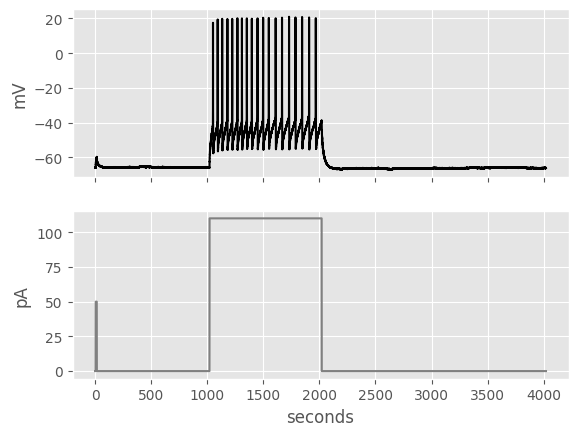

In [129]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


sweep_number = 30
sweep_data = data_set.get_sweep(sweep_number)

index_range = sweep_data["index_range"]
i = sweep_data["stimulus"][0:index_range[1]+1]
v = sweep_data["response"][0:index_range[1]+1]
i *= 1e12
v *= 1e3

sampling_rate = sweep_data["sampling_rate"]
t = np.arange(0, len(v)) * (1.0 / sampling_rate)
t*=1000

plt.style.use('ggplot')
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(t, v, color='black')
axes[1].plot(t, i, color='gray')
axes[0].set_ylabel("mV")
axes[1].set_ylabel("pA")
axes[1].set_xlabel("seconds")
plt.show()

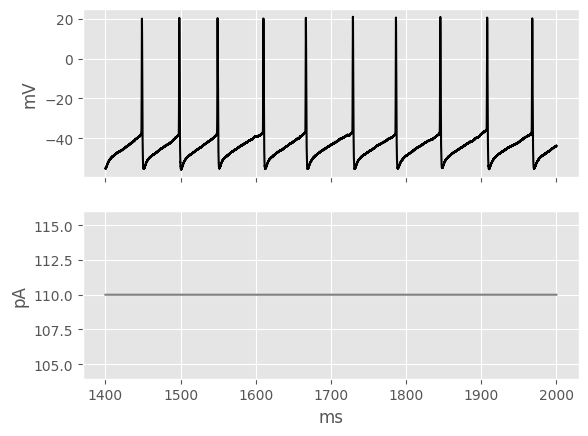

In [130]:
mask =(t>=1400)&(t<=2000)
t=t[mask]
v=v[mask]
i=i[mask]

plt.style.use('ggplot')
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(t, v, color='black')
axes[1].plot(t, i, color='gray')
axes[0].set_ylabel("mV")
axes[1].set_ylabel("pA")
axes[1].set_xlabel("ms")
plt.show()

-55.5625
20.875002
-1.0
1.0


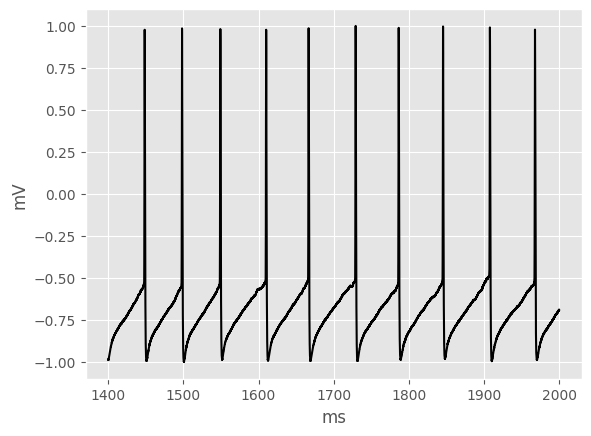

In [131]:
downsampling_indices=np.arange(0,len(v),6)
v_ds=v[downsampling_indices]
t_ds=t[downsampling_indices]

v_min=v_ds.min()
v_max=v_ds.max()
print(v_min)
print(v_max)

v_ds=2*(v_ds-v_min)/(v_max-v_min)-1
print(v_ds.min())
print(v_ds.max())

plt.style.use('ggplot')
plt.plot(t_ds, v_ds, color='black')
plt.ylabel("mV")
plt.xlabel("ms")
plt.show()

In [132]:
len(v_ds)

20001

# First order

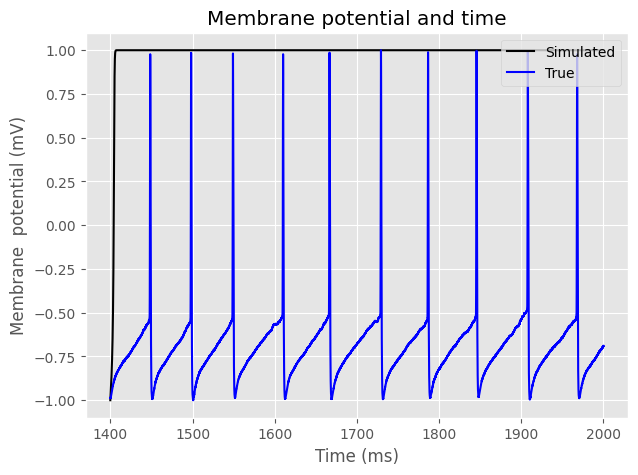

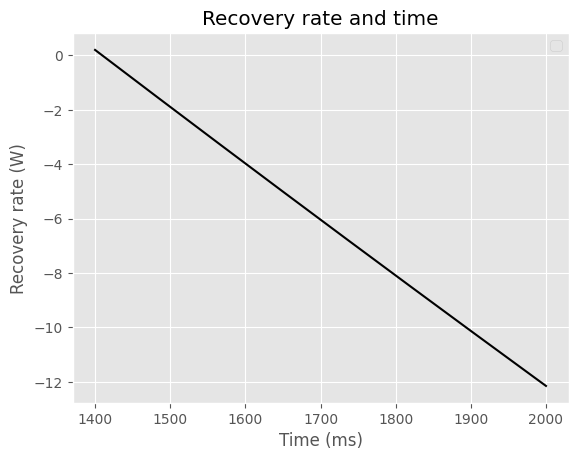

In [ ]:
class SNModel:
    def __init__(self, v0, w0,w,v, I, a, b, e, t0):
        self.t = t0
        self.v = v0
        self.w = w0
        self.v_con=v
        self.w_con=w
        self.I = I
        self.b = b
        self.e = e
        self.a=a
        self.history = {'v': [v0], 'w': [w0],'t':[t0]}

    def update(self, dt):

        dv = (self.v-((self.v**3)/3)-self.w_con+self.I) * dt
        dw = (self.e*(self.v_con+self.a-self.b*self.w)) * dt
        self.t+=dt
        self.v =self.v+dv
        self.w =self.w+dw
        self.history['v'].append(self.v)
        self.history['w'].append(self.w)
        self.history['t'].append(self.t)

    def simulate(self, t_0, t_max, dt):
        time=np.arange(t_0,t_max,dt)
        for _ in range(1,len(time)):
          self.update(dt)

v_0 = -1
w_0 = 0.2
v=-1
w= -0.5
I= 0.3
a=0.7
b=0.001
e=0.07
dt = 0.01
t_0=1400
t_max=2000


sn_model = SNModel(v_0, w_0, w, v, I, a, b, e,t_0)
sn_model.simulate(t_0,t_max, dt)
w = pd.Series(sn_model.history['w'])
v = pd.Series(sn_model.history['v'])
t = pd.Series(sn_model.history['t'])
v_min=v.min()
v_max=v.max()
v=2*(v-v_min)/(v_max-v_min)-1
plt.figure(figsize=(7, 5))
plt.plot(t, v, color='black',label='Simulated')
plt.plot(t_ds, v_ds, color='blue',label='True')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane  potential (mV)')
plt.title('Membrane potential and time')
plt.legend(loc='upper right')
plt.show()
plt.plot(t, w, color='black')
plt.xlabel('Time (ms)')
plt.ylabel('Recovery rate (W)')
plt.title('Recovery rate and time')
plt.legend()
plt.show()

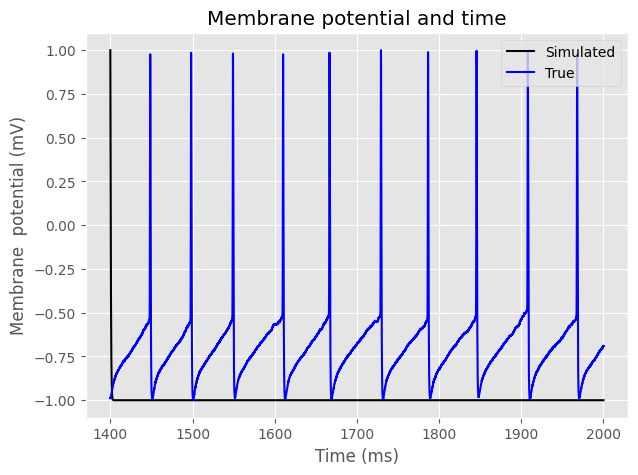

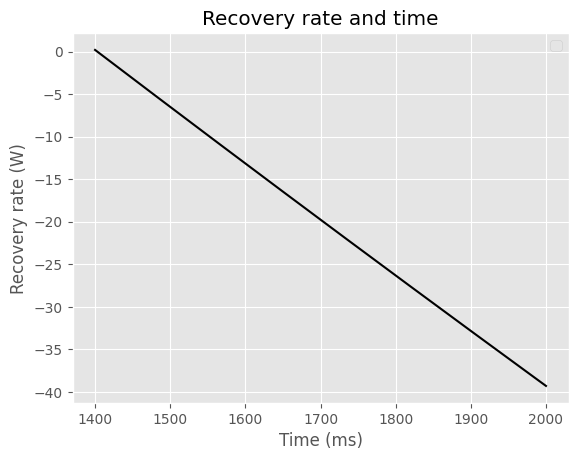

In [ ]:
class SNModel:
    def __init__(self, v0, w0,w,v, I, a, b, e, t0):
        self.t = t0
        self.v = v0
        self.w = w0
        self.v_con=v
        self.w_con=w
        self.I = I
        self.b = b
        self.e = e
        self.a=a
        self.history = {'v': [v0], 'w': [w0],'t':[t0]}

    def update(self, dt):

        dv = (self.v-((self.v**3)/3)-self.w_con+self.I) * dt
        dw = (self.e*(self.v_con+self.a-self.b*self.w)) * dt
        self.t+=dt
        self.v =self.v+dv
        self.w =self.w+dw
        self.history['v'].append(self.v)
        self.history['w'].append(self.w)
        self.history['t'].append(self.t)

    def simulate(self, t_0, t_max, dt):
        time=np.arange(t_0,t_max,dt)
        for _ in range(1,len(time)):
          self.update(dt)

v_0 = -1
w_0 = 0.2
v=-1
w= 0.5
I= 0.3
a=0.04
b=0.001
e=0.07
dt = 0.01
t_0=1400
t_max=2000


sn_model = SNModel(v_0, w_0, w, v, I, a, b, e,t_0)
sn_model.simulate(t_0, t_max, dt)
w = pd.Series(sn_model.history['w'])
v = pd.Series(sn_model.history['v'])
t = pd.Series(sn_model.history['t'])
v_min=v.min()
v_max=v.max()
v=2*(v-v_min)/(v_max-v_min)-1
plt.figure(figsize=(7, 5))
plt.plot(t, v, color='black',label='Simulated')
plt.plot(t_ds, v_ds, color='blue',label='True')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane  potential (mV)')
plt.title('Membrane potential and time')
plt.legend(loc='upper right')
plt.show()
plt.plot(t, w, color='black')
plt.xlabel('Time (ms)')
plt.ylabel('Recovery rate (W)')
plt.title('Recovery rate and time')
plt.legend()
plt.show()

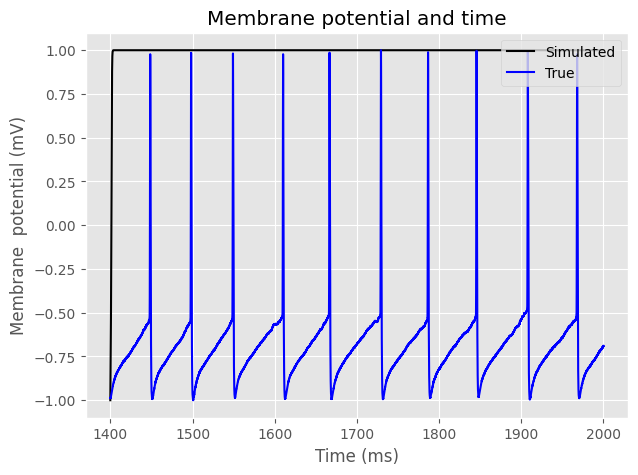

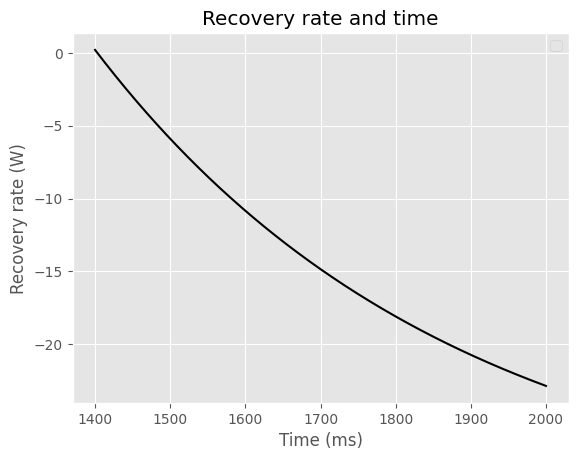

In [ ]:
class SNModel:
    def __init__(self, v0, w0,w,v, I, a, b, e, t0):
        self.t = t0
        self.v = v0
        self.w = w0
        self.v_con=v
        self.w_con=w
        self.I = I
        self.b = b
        self.e = e
        self.a=a
        self.history = {'v': [v0], 'w': [w0],'t':[t0]}

    def update(self, dt):

        dv = (self.v-((self.v**3)/3)-self.w_con+self.I) * dt
        dw = (self.e*(self.v_con+self.a-self.b*self.w)) * dt
        self.t+=dt
        self.v =self.v+dv
        self.w =self.w+dw
        self.history['v'].append(self.v)
        self.history['w'].append(self.w)
        self.history['t'].append(self.t)

    def simulate(self, t_0, t_max, dt):
        time=np.arange(t_0,t_max,dt)
        for _ in range(1,len(time)):
          self.update(dt)

v_0 = -1
w_0 = 0.2
v=-1
w= -0.5
I= 1
a=0.04
b=0.03
e=0.07
dt = 0.01
t_0=1400
t_max=2000


sn_model = SNModel(v_0, w_0, w, v, I, a, b, e,t_0)
sn_model.simulate(t_0, t_max, dt)
w = pd.Series(sn_model.history['w'])
v = pd.Series(sn_model.history['v'])
t = pd.Series(sn_model.history['t'])
v_min=v.min()
v_max=v.max()
v=2*(v-v_min)/(v_max-v_min)-1
plt.figure(figsize=(7, 5))
plt.plot(t, v, color='black',label='Simulated')
plt.plot(t_ds, v_ds, color='blue',label='True')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane  potential (mV)')
plt.title('Membrane potential and time')
plt.legend(loc='upper right')
plt.show()
plt.plot(t, w, color='black')
plt.xlabel('Time (ms)')
plt.ylabel('Recovery rate (W)')
plt.title('Recovery rate and time')
plt.legend()
plt.show()

60000


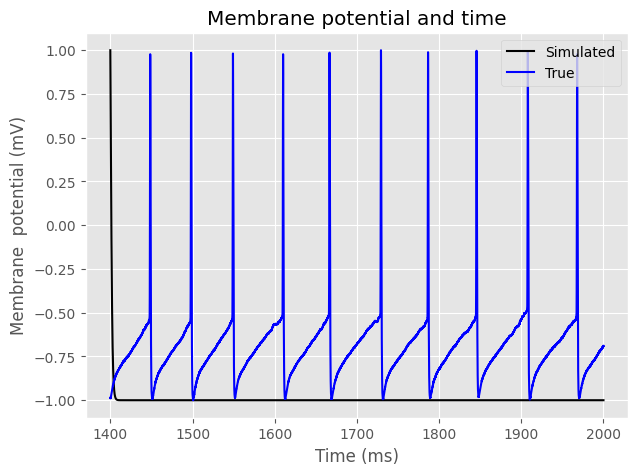

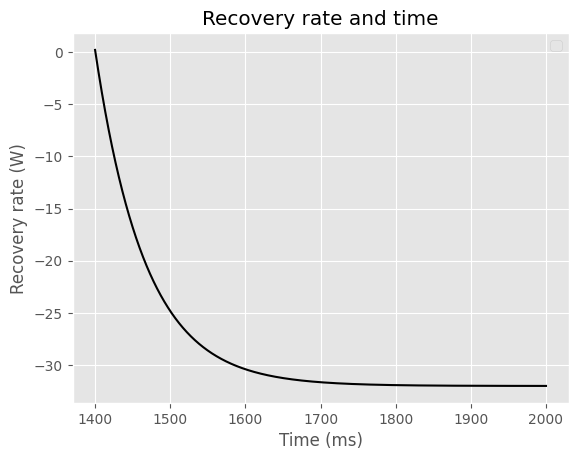

In [ ]:
class SNModel:
    def __init__(self, v0, w0,w,v, I, a, b, e, t0):
        self.t = t0
        self.v = v0
        self.w = w0
        self.v_con=v
        self.w_con=w
        self.I = I
        self.b = b
        self.e = e
        self.a=a
        self.history = {'v': [v0], 'w': [w0],'t':[t0]}

    def update(self, dt):

        dv = (self.v-((self.v**3)/3)-self.w_con+self.I) * dt
        dw = (self.e*(self.v_con+self.a-self.b*self.w)) * dt
        self.t+=dt
        self.v =self.v+dv
        self.w =self.w+dw
        self.history['v'].append(self.v)
        self.history['w'].append(self.w)
        self.history['t'].append(self.t)

    def simulate(self, t_0, t_max, dt):
        time=np.arange(t_0,t_max,dt)
        print(len(time))
        for _ in range(1,len(time)):
          self.update(dt)

v_0 = -1
w_0 = 0.2
v=-1
w= 0.5
I= 1
a=0.04
b=0.03
e=0.5
dt = 0.01
t_0=1400
t_max=2000


sn_model = SNModel(v_0, w_0, w, v, I, a, b, e,t_0)
sn_model.simulate(t_0, t_max, dt)
w = pd.Series(sn_model.history['w'])
v = pd.Series(sn_model.history['v'])
t = pd.Series(sn_model.history['t'])
v_min=v.min()
v_max=v.max()
v=2*(v-v_min)/(v_max-v_min)-1
plt.figure(figsize=(7, 5))
plt.plot(t, v, color='black',label='Simulated')
plt.plot(t_ds, v_ds, color='blue',label='True')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane  potential (mV)')
plt.title('Membrane potential and time')
plt.legend(loc='upper right')
plt.show()
plt.plot(t, w, color='black')
plt.xlabel('Time (ms)')
plt.ylabel('Recovery rate (W)')
plt.title('Recovery rate and time')
plt.legend()
plt.show()



# Second order

## Baseline model

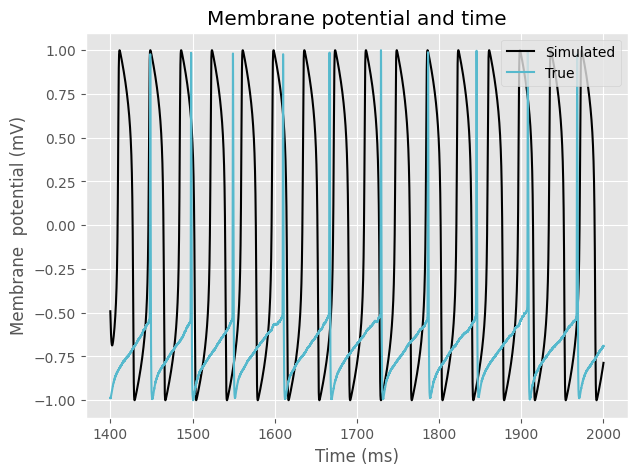

In [33]:
class SNModel:
    def __init__(self, v0, w0, I,a, b, e, t0):
        self.t = t0
        self.v = v0
        self.w = w0
        self.I = I
        self.b = b
        self.e = e
        self.a= a
        self.history = {'v': [v0], 'w': [w0],'t':[t0]}

    def update(self, dt):
        dv = (self.v-((self.v**3)/3)-self.w+self.I) * dt
        dw = (self.e*(self.v+self.a-self.b*self.w)) * dt
        self.t+=dt
        self.v =self.v+dv
        self.w =self.w+dw
        self.v = np.clip(self.v, -10, 10)
        self.w = np.clip(self.w, -10, 10)
        self.history['v'].append(self.v)
        self.history['w'].append(self.w)
        self.history['t'].append(self.t)

    def simulate(self, t_0, t_max, dt):
        time=np.arange(t_0,t_max,dt)
        for _ in range(1,len(time)):
          self.update(dt)

v_0 = -1
w_0 = -0.2
I= 0.1
a=0.04
b=0.001
e=0.07
dt = 0.01
t_0=1400
t_max=2000


sn_model = SNModel(v_0, w_0, I, a, b, e,t_0)
sn_model.simulate(t_0, t_max, dt)
w = pd.Series(sn_model.history['w'])
v = pd.Series(sn_model.history['v'])
t = pd.Series(sn_model.history['t'])
v_min=v.min()
v_max=v.max()
v=2*(v-v_min)/(v_max-v_min)-1

plt.figure(figsize=(7, 5))
plt.plot(t, v, color='black',label='Simulated')
plt.plot(t_ds, v_ds, color='#56B9CD',label='True')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane  potential (mV)')
plt.title('Membrane potential and time')
plt.legend(loc='upper right')
plt.show()

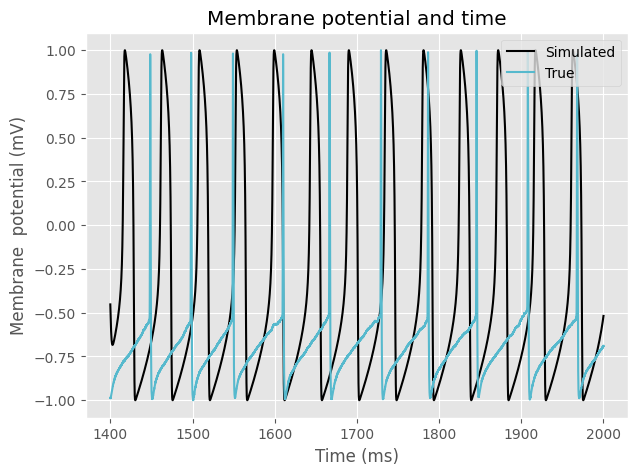

In [12]:
class SNModel:
    def __init__(self, v0, w0, I,a, b, e, t0):
        self.t = t0
        self.v = v0
        self.w = w0
        self.I = I
        self.b = b
        self.e = e
        self.a= a
        self.history = {'v': [v0], 'w': [w0],'t':[t0]}

    def update(self, dt):
        dv = (self.v-((self.v**3)/3)-self.w+self.I) * dt
        dw = (self.e*(self.v+self.a-self.b*self.w)) * dt
        self.t+=dt
        self.v =self.v+dv
        self.w =self.w+dw
        self.history['v'].append(self.v)
        self.history['w'].append(self.w)
        self.history['t'].append(self.t)

    def simulate(self, t_0, t_max, dt):
        time=np.arange(t_0,t_max,dt)
        for _ in range(1,len(time)):
          self.update(dt)

v_0 = -1
w_0 = -0.2
I= 0.1
a=0.7
b=0.001
e=0.07
dt = 0.01
t_0=1400
t_max=2000


sn_model = SNModel(v_0, w_0, I, a, b, e,t_0)
sn_model.simulate(t_0, t_max, dt)
w = pd.Series(sn_model.history['w'])
v = pd.Series(sn_model.history['v'])
t = pd.Series(sn_model.history['t'])
v_min=v.min()
v_max=v.max()
v=2*(v-v_min)/(v_max-v_min)-1

plt.figure(figsize=(7, 5))
plt.plot(t, v, color='black',label='Simulated')
plt.plot(t_ds, v_ds, color='#56B9CD',label='True')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane  potential (mV)')
plt.title('Membrane potential and time')
plt.legend(loc='upper right')
plt.show()

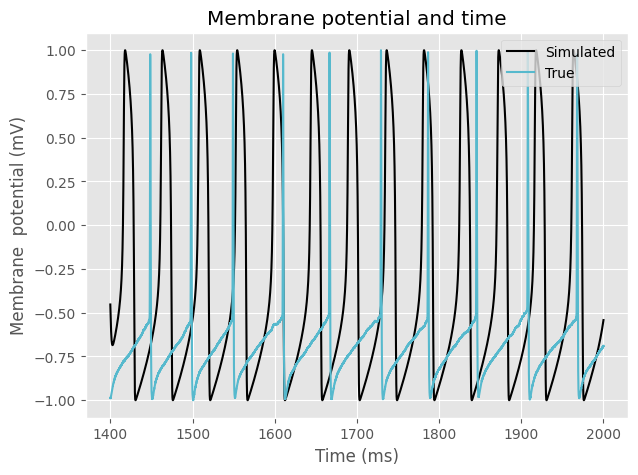

In [13]:
class SNModel:
    def __init__(self, v0, w0, I,a, b, e, t0):
        self.t = t0
        self.v = v0
        self.w = w0
        self.I = I
        self.b = b
        self.e = e
        self.a= a
        self.history = {'v': [v0], 'w': [w0],'t':[t0]}

    def update(self, dt):
        dv = (self.v-((self.v**3)/3)-self.w+self.I) * dt
        dw = (self.e*(self.v+self.a-self.b*self.w)) * dt
        self.t+=dt
        self.v =self.v+dv
        self.w =self.w+dw
        self.history['v'].append(self.v)
        self.history['w'].append(self.w)
        self.history['t'].append(self.t)

    def simulate(self, t_0, t_max, dt):
        time=np.arange(t_0,t_max,dt)
        for _ in range(1,len(time)):
          self.update(dt)

v_0 = -1
w_0 = -0.2
I= 0.1
a=0.7
b=0.03
e=0.07
dt = 0.01
t_0=1400
t_max=2000


sn_model = SNModel(v_0, w_0, I, a, b, e,t_0)
sn_model.simulate(t_0, t_max, dt)
w = pd.Series(sn_model.history['w'])
v = pd.Series(sn_model.history['v'])
t = pd.Series(sn_model.history['t'])
v_min=v.min()
v_max=v.max()
v=2*(v-v_min)/(v_max-v_min)-1

plt.figure(figsize=(7, 5))
plt.plot(t, v, color='black',label='Simulated')
plt.plot(t_ds, v_ds, color='#56B9CD',label='True')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane  potential (mV)')
plt.title('Membrane potential and time')
plt.legend(loc='upper right')
plt.show()

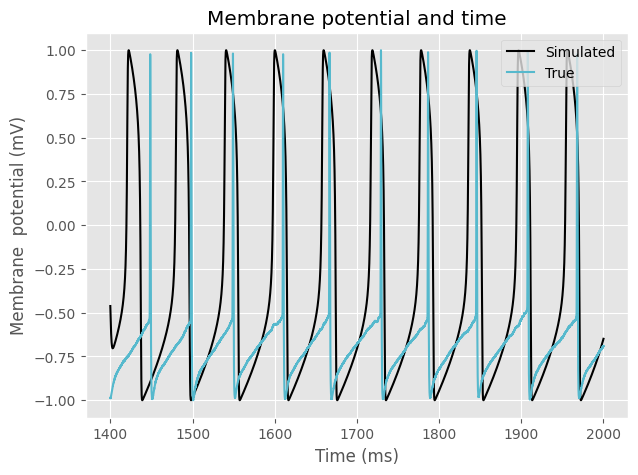

In [14]:
class SNModel:
    def __init__(self, v0, w0, I,a, b, e, t0):
        self.t = t0
        self.v = v0
        self.w = w0
        self.I = I
        self.b = b
        self.e = e
        self.a= a
        self.history = {'v': [v0], 'w': [w0],'t':[t0]}

    def update(self, dt):
        dv = (self.v-((self.v**3)/3)-self.w+self.I) * dt
        dw = (self.e*(self.v+self.a-self.b*self.w)) * dt
        self.t+=dt
        self.v =self.v+dv
        self.w =self.w+dw
        self.history['v'].append(self.v)
        self.history['w'].append(self.w)
        self.history['t'].append(self.t)

    def simulate(self, t_0, t_max, dt):
        time=np.arange(t_0,t_max,dt)
        for _ in range(1,len(time)):
          self.update(dt)

v_0 = -1
w_0 = -0.2
I= 0.1
a=0.7
b=0.03
e=0.05
dt = 0.01
t_0=1400
t_max=2000


sn_model = SNModel(v_0, w_0, I, a, b, e,t_0)
sn_model.simulate(t_0, t_max, dt)
w = pd.Series(sn_model.history['w'])
v = pd.Series(sn_model.history['v'])
t = pd.Series(sn_model.history['t'])
v_min=v.min()
v_max=v.max()
v=2*(v-v_min)/(v_max-v_min)-1

plt.figure(figsize=(7, 5))
plt.plot(t, v, color='black',label='Simulated')
plt.plot(t_ds, v_ds, color='#56B9CD',label='True')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane  potential (mV)')
plt.title('Membrane potential and time')
plt.legend(loc='upper right')
plt.show()

## Gradient decent

In [ ]:
class GDModel:
    def __init__(self, v0, w0, I, a,b, e,t_0):
        self.v = v0
        self.w = w0
        self.I = I
        self.a = a
        self.b = b
        self.e = e
        self.t= t_0
        self.history = {'v': [v0], 'w': [w0], 't':[t_0]}

    def update(self, dt):
        dv = (self.v-((self.v**3)/3)-self.w+self.I) * dt
        dw = (self.e*(self.v+self.a-self.b*self.w)) * dt
        self.v =self.v+dv
        self.w =self.w+dw
        self.history['v'].append(self.v)
        self.history['w'].append(self.w)
        self.history['t'].append(self.t)

    def simulate(self, t_0,t_max, dt):
        time=np.arange(t_0,t_max,dt)
        for _ in range(1,len(time)):
          self.update(dt)
        return self.history


def cost_function(a, b, e, v_0, w_0, I, t_0, t_max, v_ds, dt):
    sn_model = GDModel(v_0, w_0, I, a, b, e, t_0)
    history= sn_model.simulate(t_0, t_max,dt)
    v_arr = np.array(history['v'])
    v_arr=2*(v_arr-v_arr.min())/(v_arr.max()-v_arr.min())-1
    estimated_voltage = v_arr
    actual_voltage=v_ds[:-1]
    mse = np.mean((estimated_voltage - actual_voltage) ** 2)
    return mse


def numerical_gradient(params, epsilon, v_ds, t_0, v_0, w_0,I, t_max, dt):
    grad = np.zeros(len(params))
    for i in range(len(params)):
        params_forward = np.array(params)
        params_forward[i] += epsilon
        grad[i] = (cost_function(params_forward[0], params_forward[1], params_forward[2], v_0, w_0, I, t_0, t_max, v_ds, dt) -
                   cost_function(params[0], params[1], params[2], v_0, w_0, I, t_0, t_max, v_ds, dt)) / epsilon
    return grad



def gradient_descent(v_ds, v_0, w_0, I, t_0, t_max, dt, initial_params=[0.3,0.9, 0.07], learning_rate=0.001, epsilon=1e-8, max_iterations=100):
    params = np.array(initial_params, dtype=np.float64)
    cost_history = []

    for iteration in range(max_iterations):
        grad = numerical_gradient(params, epsilon, v_ds, t_0, v_0, w_0, I, t_max, dt)
        params -= learning_rate * grad
        cost = cost_function(params[0], params[1], params[2], v_0, w_0, I, t_0, t_max, v_ds, dt)
        cost_history.append(cost)
        if iteration % 10 == 0:
            print(f"Iteration {iteration}: Cost = {cost}")


    return *params, cost_history

In [ ]:
v_0 = -1
w_0 = 1
I= 0.1
dt = 0.03
t_0=1400
t_max=2000
total_time = len(v_ds)

optimized_a, optimized_b, optimized_e, cost_history = gradient_descent(v_ds, v_0, w_0, I, t_0, t_max, dt)

print(f"Optimized Parameters: a={optimized_a}, b={optimized_b}, e={optimized_e}")

Iteration 0: Cost = 0.8892864913855592
Iteration 10: Cost = 0.8693629258067477
Iteration 20: Cost = 0.8309389419209637
Iteration 30: Cost = 0.8417129670534272
Iteration 40: Cost = 0.8195348225521002
Iteration 50: Cost = 0.8057769494426411
Iteration 60: Cost = 0.8019522598939056
Iteration 70: Cost = 0.7808504224022196
Iteration 80: Cost = 0.7699227786156175
Iteration 90: Cost = 0.7571339572173021
Optimized Parameters: a=0.3874235434489279, b=0.9154529067097897, e=0.17460616303165083


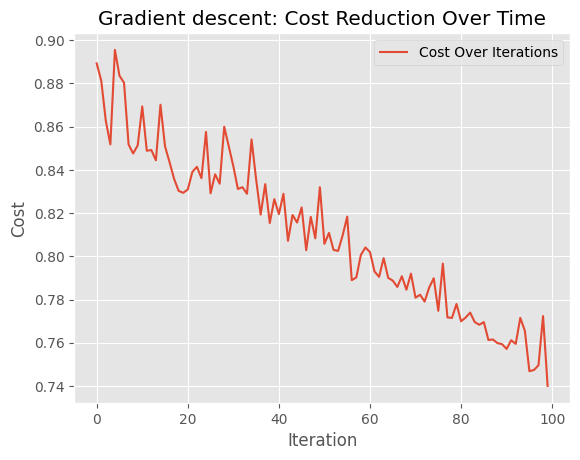

In [ ]:
plt.plot(cost_history, label='Cost Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Gradient descent: Cost Reduction Over Time')
plt.legend()
plt.show()

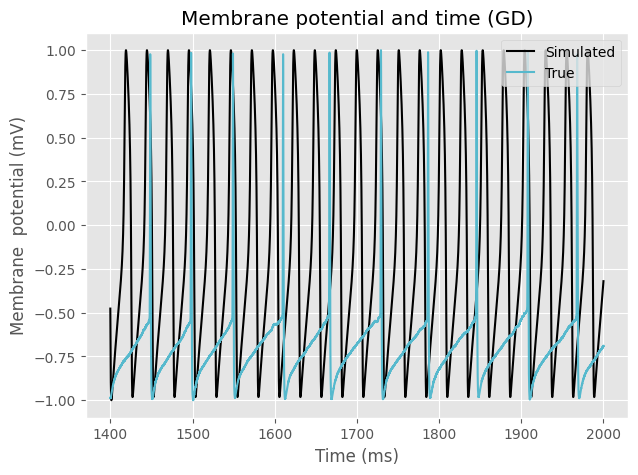

In [ ]:
sn_model = SNModel(v_0, w_0, I, optimized_a, optimized_b, optimized_e,t_0)
sn_model.simulate(t_0, t_max, dt)
w = pd.Series(sn_model.history['w'])
v = pd.Series(sn_model.history['v'])
t = pd.Series(sn_model.history['t'])
v_min=v.min()
v_max=v.max()
v=2*(v-v_min)/(v_max-v_min)-1
plt.figure(figsize=(7, 5))
plt.plot(t, v, color='black',label='Simulated')
plt.plot(t_ds, v_ds, color='#56B9CD',label='True')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane  potential (mV)')
plt.title('Membrane potential and time (GD)')
plt.legend(loc='upper right')
plt.show()

## Simulated annealing

In [30]:
class SAModel:
    def __init__(self, v0, w0, I, a, b, e,t_0):
        self.v = v0
        self.w = w0
        self.I = I
        self.a = a
        self.b = b
        self.e = e
        self.t= t_0
        self.dt=0.03
        self.history = {'v': [v0], 'w': [w0], 't':[t_0]}

    def update(self):
        dv = (self.v-((self.v**3)/3)-self.w+self.I) * self.dt
        dw = (self.e*(self.v+self.a-self.b*self.w)) * self.dt
        self.v =self.v+dv
        self.w =self.w+dw
        self.v = np.clip(self.v, -10, 10)
        self.w = np.clip(self.w, -10, 10)
        self.history['v'].append(self.v)
        self.history['w'].append(self.w)
        self.history['t'].append(self.t)

    def simulate(self, t_0,t_max, dt):
        time=np.arange(t_0,t_max,dt)
        for _ in range(1,len(time)):
          self.update()
        return self.history

def cost_function(a, b, e, v_0, w_0, I, t_0, t_max, v_ds, dt):
    sa_model = SAModel(v_0, w_0, I, a, b, e, t_0)
    history= sa_model.simulate(t_0,t_max, dt)
    actual_voltage=v_ds
    time= np.arange(t_0,t_max,dt)
    num_samples = int((t_max - t_0) / dt) + 1
    time_points = np.linspace(t_0, t_max, num_samples -1)
    sim_interp = interp1d(time_points, history['v'], kind='linear', fill_value='extrapolate')
    simulated_at_observed = sim_interp(t_ds)
    mse = np.mean((actual_voltage - simulated_at_observed) ** 2)
    return mse

def simulated_annealing(v_0, w_0, I, t_0, t_max, v_ds, dt):
    a, b, e = 1, 1, 1
    best_a, best_b, best_e = a, b, e
    best_cost = np.inf
    cost_history = []
    temp = 1.0
    temp_min = 0.0001
    alpha = 0.999
    while temp > temp_min:
        a_try, b_try, e_try = a + np.random.uniform(-1, 1), b + np.random.uniform(-1, 1), e + np.random.uniform(-1, 1)
        cost_current = cost_function(a, b, e, v_0, w_0, I, t_0, t_max, v_ds, dt)
        cost_try = cost_function(a_try, b_try, e_try, v_0, w_0, I, t_0, t_max, v_ds, dt)

        if cost_try < best_cost:
            best_cost = cost_try
            best_a, best_b, best_e = a_try, b_try, e_try

        if cost_try < cost_current or np.random.uniform() < np.exp((cost_current - cost_try) / temp):
            a, b, e = a_try, b_try, e_try

        cost_history.append(best_cost)
        temp *= alpha

    return best_a, best_b, best_e, cost_history


In [31]:
v_0 = -1
w_0 = 1
I= 0.01
dt = 0.3
t_0=1400
t_max=2000

optimized_a, optimized_b, optimized_e, cost_history = simulated_annealing(v_0, w_0, I, t_0, t_max, v_ds, dt)

print(f"Optimized Parameters: a={optimized_a}, b={optimized_b}, e={optimized_e}")

Optimized Parameters: a=-1.5554594791861145, b=3.793891707748129, e=3.6470495749969465


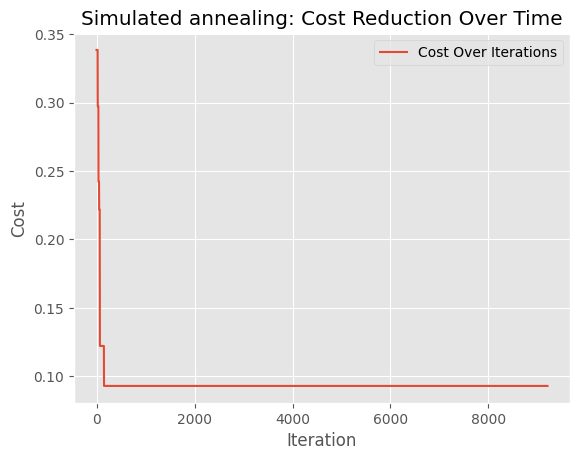

In [34]:
plt.plot(cost_history, label='Cost Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Simulated annealing: Cost Reduction Over Time')
plt.legend()
plt.show()

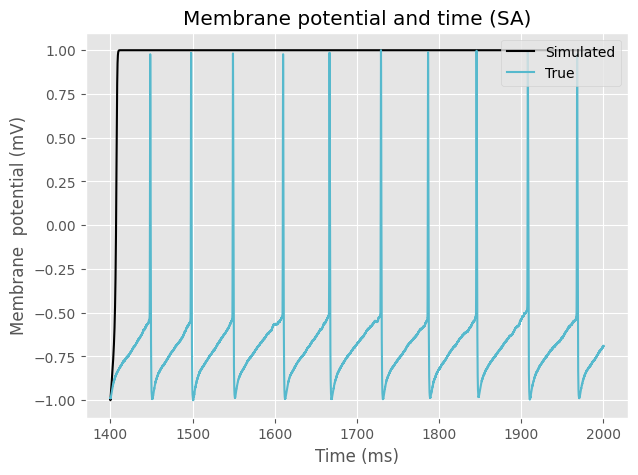

In [35]:
sn_model = SNModel(v_0, w_0, I, optimized_a, optimized_b, optimized_e,t_0)
sn_model.simulate(t_0, t_max, dt)
w = pd.Series(sn_model.history['w'])
v = pd.Series(sn_model.history['v'])
v_min=v.min()
v_max=v.max()
v=2*(v-v_min)/(v_max-v_min)-1
plt.figure(figsize=(7, 5))
time=np.arange(t_0,t_max,dt)
steps=int((t_max-t_0)/dt)
timepoint=np.linspace(t_ds[0], t_ds[-1], steps)
plt.plot(timepoint, v, color='black',label='Simulated')
plt.plot(t_ds, v_ds, color='#56B9CD',label='True')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane  potential (mV)')
plt.title('Membrane potential and time (SA)')
plt.legend(loc='upper right')
plt.show()

## Genetic algorithm

In [53]:
class GAModel:
    def __init__(self, v0, w0, I, a, b, e,t_0):
        self.v = v0
        self.w = w0
        self.I = I
        self.a = a
        self.b = b
        self.e = e
        self.t= t_0
        self.dt=0.03
        self.history = {'v': [v0], 'w': [w0], 't':[t_0]}

    def update(self):
        dv = (self.v-((self.v**3)/3)-self.w+self.I) * self.dt
        dw = (self.e*(self.v+self.a-self.b*self.w)) * self.dt
        self.v =self.v+dv
        self.w =self.w+dw
        self.history['v'].append(self.v)
        self.history['w'].append(self.w)
        self.history['t'].append(self.t)

    def simulate(self, t_0,t_max, dt):
        time=np.arange(t_0,t_max,dt)
        for _ in range(1,len(time)):
          self.update()
        return self.history

def cost_function(a, b, e, v_0, w_0, I, t_0, t_max, v_ds, dt):
    sa_model = SAModel(v_0, w_0, I, a, b, e, t_0)
    history= sa_model.simulate(t_0,t_max, dt)
    actual_voltage=v_ds
    time= np.arange(t_0,t_max,dt)
    num_samples = int((t_max - t_0) / dt) + 1
    time_points = np.linspace(t_0, t_max, num_samples -1)
    sim_interp = interp1d(time_points, history['v'], kind='linear', fill_value='extrapolate')
    simulated_at_observed = sim_interp(t_ds)
    mse = np.mean((actual_voltage - simulated_at_observed) ** 2)
    return mse

def fitness_function(a, b, e, v_0, w_0, I, t_0, t_max, v_ds, dt):
    mse = cost_function(a, b, e, v_0, w_0, I, t_0, t_max, v_ds, dt)

    return -mse

def initialize_population(size, param_bounds):
    num_parameters = len(param_bounds)
    population = np.random.rand(size, num_parameters)
    for i in range(num_parameters):
        population[:, i] = param_bounds[i][0] + population[:, i] * (param_bounds[i][1] - param_bounds[i][0])
    return population

def select_parents(population, fitness, num_parents):
    parents = population[np.argsort(fitness)[-num_parents:]]
    return parents


def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    crossover_point = np.uint8(offspring_size[1] / 2)
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k + 1) % parents.shape[0]
        offspring[k, :crossover_point] = parents[parent1_idx, :crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring


def mutate(offspring_crossover, param_bounds):
    mutations_strength = 0.001
    for idx in range(offspring_crossover.shape[0]):
        param_to_mutate = np.random.randint(0, offspring_crossover.shape[1])
        random_value = np.random.uniform(-mutations_strength, mutations_strength)

        offspring_crossover[idx, param_to_mutate] += random_value
        offspring_crossover[idx, param_to_mutate] = np.clip(offspring_crossover[idx, param_to_mutate], param_bounds[param_to_mutate][0], param_bounds[param_to_mutate][1])
    return offspring_crossover

def run_ga(v_0, w_0, I, t_0, t_max, v_ds, dt, generations=100, population_size=50, num_parents=25, param_bounds=[(-1, 1), (-1, 1), (-1, 1)]):
    population = initialize_population(population_size, param_bounds)
    best_fitness_history = []
    for generation in range(generations):
        fitness = np.array([fitness_function(ind[0], ind[1], ind[2], v_0, w_0, I,t_0, t_max, v_ds, dt) for ind in population])

        best_fitness_history.append(np.max(fitness))

        parents = select_parents(population, fitness, num_parents)

        offspring_crossover = crossover(parents, (population_size - parents.shape[0], 3))

        offspring_mutation = mutate(offspring_crossover, param_bounds)

        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = offspring_mutation

    best_fit_idx = np.argmax(fitness)
    best_solution = population[best_fit_idx]
    return best_solution, best_fitness_history

In [55]:
v_0 = -1
w_0 = 1
I= 0.01
dt = 0.3
t_0=1400
t_max=2000

optimized_params, best_fitness_history = run_ga(v_0, w_0, I, t_0, t_max, v_ds, dt)
print(f"Optimized Parameters: a={optimized_params[0]}, b={optimized_params[1]}, e={optimized_params[2]}")

Optimized Parameters: a=0.4957443113182071, b=0.7053586196335636, e=0.879334644115419


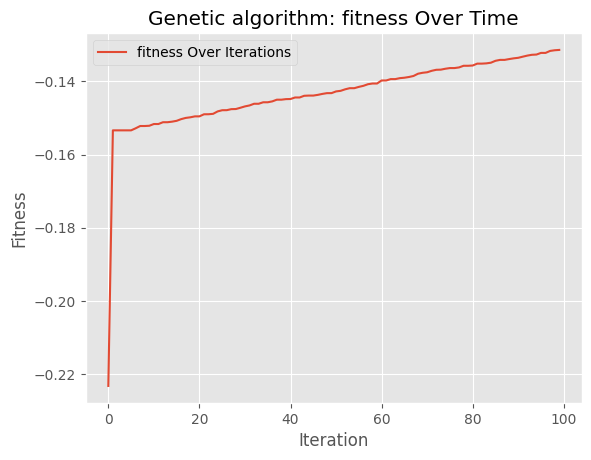

In [56]:
plt.plot(best_fitness_history, label='fitness Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Genetic algorithm: fitness Over Time')
plt.legend()
plt.show()

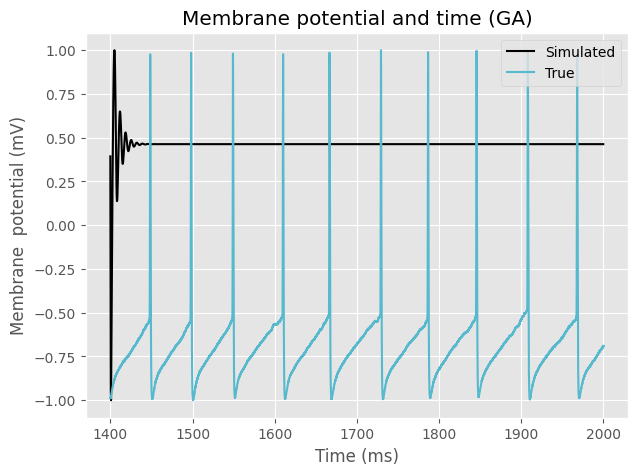

In [57]:
sn_model = SNModel(v_0, w_0, I, optimized_params[0], optimized_params[1], optimized_params[2],t_0)
sn_model.simulate(t_0, t_max, dt)
w = pd.Series(sn_model.history['w'])
v = pd.Series(sn_model.history['v'])
t = pd.Series(sn_model.history['t'])
v_min=v.min()
v_max=v.max()
v=2*(v-v_min)/(v_max-v_min)-1
plt.figure(figsize=(7, 5))
plt.plot(t, v, color='black',label='Simulated')
plt.plot(t_ds, v_ds, color='#56B9CD',label='True')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane  potential (mV)')
plt.title('Membrane potential and time (GA)')
plt.legend(loc='upper right')
plt.show()

# Leaky fire and integrate model

## Baseline model

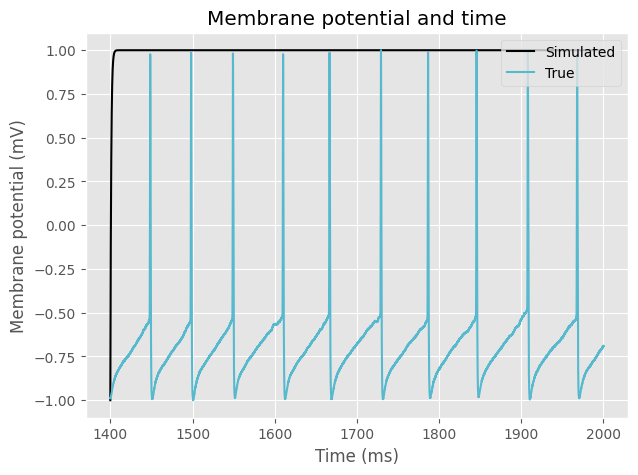

In [133]:
class LIFModel:
    def __init__(self, v0, I, tau_w, E_l, g_l, v_th, v_reset, t0):
        self.t = t0
        self.v = v0
        self.I = I
        self.tau_w = tau_w
        self.E_l = E_l
        self.g_l = g_l
        self.v_th = v_th
        self.v_reset = v_reset
        self.history = {'v': [v0], 't': [t0]}

    def update(self, dt):
        dv = (-(self.v - self.E_l) + self.I / self.g_l) / self.tau_w * dt
        self.v += dv
        self.t += dt
        if self.v >= self.v_th:
            self.v = self.v_reset

        self.history['v'].append(self.v)
        self.history['t'].append(self.t)

    def simulate(self, t_0, t_max, dt):
        time = np.arange(t_0, t_max, dt)
        for _ in range(1, len(time)):
            self.update(dt)

v_0 = -1
I = 0.1
tau_w = 1
E_l = 0.5
g_l = 0.1
v_th = 20.0
v_reset = -65.0
dt = 0.03
t_0 = t_ds[0]
t_max = t_ds[-1]

lif_model = LIFModel(v_0, I, tau_w, E_l, g_l, v_th, v_reset, t_0)
lif_model.simulate(t_0, t_max, dt)

v_arr = np.array(lif_model.history['v'])
v_arr=2*(v_arr-v_arr.min())/(v_arr.max()-v_arr.min())-1
t = pd.Series(lif_model.history['t'])

plt.figure(figsize=(7, 5))
plt.plot(t, v_arr, color='black', label='Simulated')
plt.plot(t_ds, v_ds, color='#56B9CD',label='True')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Membrane potential and time')
plt.legend(loc='upper right')
plt.show()


## Gradient descent

In [93]:
class LIF_GDModel:
    def __init__(self, tau_w, E_l, g_l,v0, I,  v_th, v_reset, t0):
        self.t = t0
        self.v = v0
        self.I = I
        self.tau_w = tau_w
        self.E_l = E_l
        self.g_l = g_l
        self.v_th = v_th
        self.v_reset = v_reset
        self.history = {'v': [v0], 't': [t0]}

    def update(self, dt):
        dv = (-(self.v - self.E_l) + self.I / self.g_l) / self.tau_w * dt
        self.v += dv
        self.t += dt
        if self.v >= self.v_th:
            self.v = self.v_reset
        self.history['v'].append(self.v)
        self.history['t'].append(self.t)

    def simulate(self, t_0, t_max, dt):
        time = np.arange(t_0, t_max, dt)
        for _ in range(1, len(time)):
            self.update(dt)
        return self.history

def cost_function(tau_w, E_l, g_l, v0, I, v_th, v_reset, t0, t_max, dt, v_ds):
    lifgd_model = LIF_GDModel(tau_w, E_l, g_l,v0, I,  v_th, v_reset, t0)
    history= lifgd_model.simulate(t_0, t_max,dt)
    v_arr = np.array(history['v'])
    v_arr=2*(v_arr-v_arr.min())/(v_arr.max()-v_arr.min())-1
    estimated_voltage = v_arr
    actual_voltage=v_ds[:-1]
    mse = np.mean((estimated_voltage - actual_voltage) ** 2)
    return mse

def numerical_gradient(params, epsilon, v0, I, tau_w, E_l, g_l, v_th, v_reset, t0, t_max, dt, v_ds):
    grad = np.zeros(len(params))
    for i in range(len(params)):
        params_forward = np.array(params)
        params_forward[i] += epsilon
        grad[i] = (cost_function(params_forward[0], params_forward[1], params_forward[2], v0, I, v_th, v_reset, t0, t_max, dt, v_ds) -
                   cost_function(params[0], params[1], params[2], v0, I, v_th, v_reset, t0, t_max, dt, v_ds)) / epsilon
    return grad



def gradient_descent(v0, I, v_th, v_reset, t0,  t_max, dt, v_ds, initial_params=[0.3,0.9, 0.07], learning_rate=0.001, epsilon=1e-8, max_iterations=10):
    params = np.array(initial_params, dtype=np.float64)
    cost_history = []

    for iteration in range(max_iterations):
        grad = numerical_gradient(params, epsilon, v0, I, tau_w, E_l, g_l, v_th, v_reset, t0, t_max, dt, v_ds)
        params -= learning_rate * grad
        cost = cost_function(params[0], params[1], params[2], v0, I, v_th, v_reset, t0, t_max, dt, v_ds)
        cost_history.append(cost)
        if iteration % 10 == 0:
            print(f"Iteration {iteration}: Cost = {cost}")
    return *params, cost_history

In [94]:
v_0 = -1
I= 0.1
dt = 0.03
t_0=1400
t_max=2000
v_th=20
v_reset=-65

optimized_tau_w, optimized_E_l, optimized_g_l, cost_history = gradient_descent(v_0, I, v_th, v_reset, t_0,  t_max, dt, v_ds)

print(f"Optimized Parameters: a={optimized_tau_w}, b={optimized_E_l}, e={optimized_g_l}")

Iteration 0: Cost = 2.9261494210283425
Optimized Parameters: a=0.30009889555840913, b=0.9, e=0.07


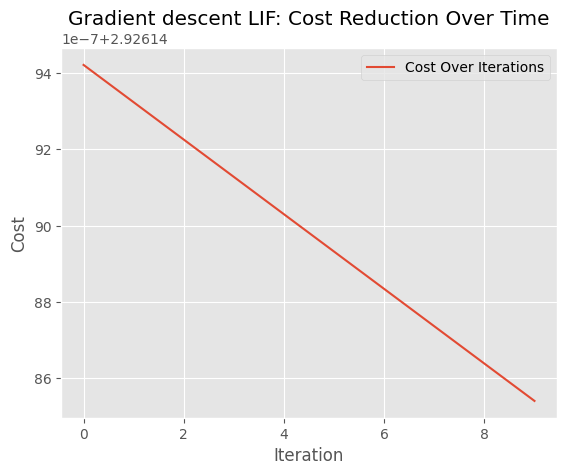

In [95]:
plt.plot(cost_history, label='Cost Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Gradient descent LIF: Cost Reduction Over Time')
plt.legend()

plt.show()

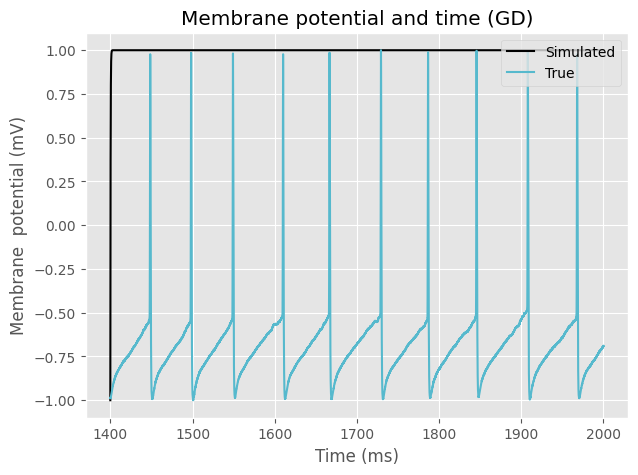

In [101]:
lif_model = LIFModel(v_0, I, optimized_tau_w, optimized_E_l, optimized_g_l, v_th, v_reset, t_0)
lif_model.simulate(t_0, t_max, dt)
t = pd.Series(lif_model.history['t'])
v = pd.Series(lif_model.history['v'])
v_min=v.min()
v_max=v.max()
v=2*(v-v_min)/(v_max-v_min)-1

time=np.arange(t_0,t_max,dt)
steps=int((t_max-t_0)/dt)
timepoint=np.linspace(t_ds[0], t_ds[-1], steps)
plt.figure(figsize=(7, 5))
plt.plot(timepoint, v, color='black',label='Simulated')
plt.plot(t_ds, v_ds, color='#56B9CD',label='True')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane  potential (mV)')
plt.title('Membrane potential and time (GD)')
plt.legend(loc='upper right')
plt.show()

## Simulated annealing

In [134]:
class LIF_SA_Model:
    def __init__(self, tau_w, E_l, g_l,v0, I,  v_th, v_reset, t0):
        self.t = t0
        self.v = v0
        self.I = I
        self.tau_w = tau_w
        self.E_l = E_l
        self.g_l = g_l
        self.v_th = v_th
        self.v_reset = v_reset
        self.history = {'v': [v0], 't': [t0]}

    def update(self, dt):
        dv = (-(self.v - self.E_l) + self.I / self.g_l) / self.tau_w * dt
        self.v += dv
        self.t += dt
        if self.v >= self.v_th:
            self.v = self.v_reset
        self.history['v'].append(self.v)
        self.history['t'].append(self.t)

    def simulate(self, t_0, t_max, dt):
        time = np.arange(t_0, t_max, dt)
        for _ in range(1, len(time)):
            self.update(dt)
        return self.history

def cost_function(tau_w, E_l, g_l, v0, I, v_th, v_reset, t0, t_max, dt, v_ds):
    lifgd_model = LIF_SA_Model(tau_w, E_l, g_l,v0, I,  v_th, v_reset, t0)
    history= lifgd_model.simulate(t_0, t_max,dt)
    v_arr = np.array(history['v'])
    v_arr=2*(v_arr-v_arr.min())/(v_arr.max()-v_arr.min())-1
    estimated_voltage = v_arr
    actual_voltage=v_ds[:-1]
    mse = np.mean((estimated_voltage - actual_voltage) ** 2)
    return mse


def simulated_annealing(v0, I, v_th, v_reset, t0, t_max, dt, v_ds):
    tau_w, E_l, g_l = 1, 1, 1
    best_tau_w, best_E_l, best_g_l = tau_w, E_l, g_l
    best_cost = np.inf
    cost_history = []
    temp = 1.0
    temp_min = 0.01
    alpha = 0.999
    while temp > temp_min:
        tau_w_try, E_l_try, g_l_try = tau_w + np.random.uniform(-1, 1), E_l + np.random.uniform(-1, 1), g_l + np.random.uniform(-1, 1)
        cost_try = cost_function(tau_w, E_l, g_l, v0, I, v_th, v_reset, t0, t_max, dt, v_ds)

        if cost_try < best_cost:
            best_cost = cost_try
            best_tau_w, best_E_l, best_g_l = tau_w_try, E_l_try, g_l_try

        if cost_try < cost_current or np.random.uniform() < np.exp((cost_current - cost_try) / temp):
            tau_w, E_l, g_l = tau_w_try, E_l_try, g_l_try

        cost_history.append(best_cost)
        temp *= alpha

    return best_tau_w, best_E_l, best_g_l, cost_history

In [135]:
v_0 = -1
I= 0.1
dt = 0.03
t_0=1400
t_max=2000
v_th=20
v_reset=-65

optimized_tau_w, optimized_E_l, optimized_g_l, cost_history = simulated_annealing(v_0, I, v_th, v_reset, t_0,  t_max, dt, v_ds)

print(f"Optimized Parameters: a={optimized_tau_w}, b={optimized_E_l}, e={optimized_g_l}")

<ipython-input-134-c6af57f5b999>:32: RuntimeWarning: invalid value encountered in subtract
  v_arr=2*(v_arr-v_arr.min())/(v_arr.max()-v_arr.min())-1
<ipython-input-134-c6af57f5b999>:32: RuntimeWarning: invalid value encountered in divide
  v_arr=2*(v_arr-v_arr.min())/(v_arr.max()-v_arr.min())-1


Optimized Parameters: a=-0.15439625347784935, b=-23.597199932464584, e=-28.624953825819556


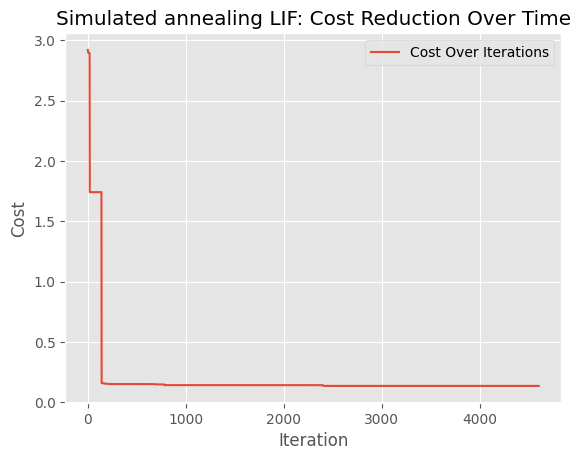

In [141]:
plt.plot(cost_history, label='Cost Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Simulated annealing LIF: Cost Reduction Over Time')
plt.legend()

plt.show()

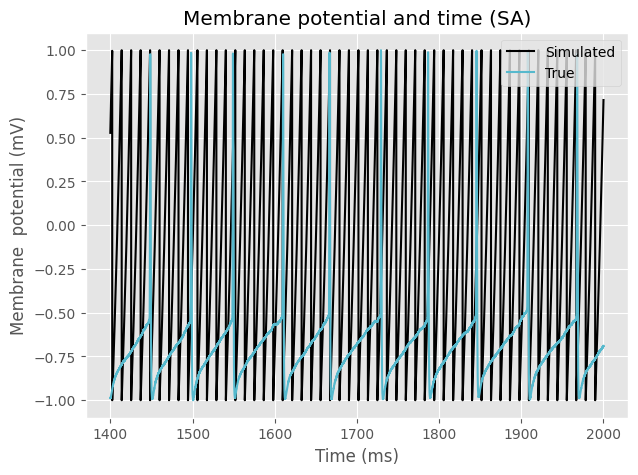

In [136]:
lif_model = LIFModel( optimized_tau_w, optimized_E_l, optimized_g_l,v_0, I, v_th, v_reset, t_0)
lif_model.simulate(t_0, t_max, dt)
t = pd.Series(lif_model.history['t'])
v = pd.Series(lif_model.history['v'])
v_min=v.min()
v_max=v.max()
v=2*(v-v_min)/(v_max-v_min)-1

time=np.arange(t_0,t_max,dt)
steps=int((t_max-t_0)/dt)
timepoint=np.linspace(t_ds[0], t_ds[-1], steps)
plt.figure(figsize=(7, 5))
plt.plot(timepoint, v, color='black',label='Simulated')
plt.plot(t_ds, v_ds, color='#56B9CD',label='True')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane  potential (mV)')
plt.title('Membrane potential and time (SA)')
plt.legend(loc='upper right')
plt.show()

## Genetic algorithm

In [137]:
class LIF_GAModel:
    def __init__(self, tau_w, E_l, g_l,v0, I,  v_th, v_reset, t0):
        self.t = t0
        self.v = v0
        self.I = I
        self.tau_w = tau_w
        self.E_l = E_l
        self.g_l = g_l
        self.v_th = v_th
        self.v_reset = v_reset
        self.history = {'v': [v0], 't': [t0]}

    def update(self, dt):
        dv = (-(self.v - self.E_l) + self.I / self.g_l) / self.tau_w * dt
        self.v += dv
        self.t += dt
        if self.v >= self.v_th:
            self.v = self.v_reset
        self.history['v'].append(self.v)
        self.history['t'].append(self.t)

    def simulate(self, t_0, t_max, dt):
        time = np.arange(t_0, t_max, dt)
        for _ in range(1, len(time)):
            self.update(dt)
        return self.history

def cost_function(tau_w, E_l, g_l, v0, I, v_th, v_reset, t0, t_max, dt, v_ds):
    lifga_model = LIF_GAModel(tau_w, E_l, g_l,v0, I, v_th, v_reset, t0)
    history= lifga_model.simulate(t_0, t_max,dt)
    v_arr = np.array(history['v'])
    v_arr=2*(v_arr-v_arr.min())/(v_arr.max()-v_arr.min())-1
    estimated_voltage = v_arr
    actual_voltage=v_ds[:-1]
    mse = np.mean((estimated_voltage - actual_voltage) ** 2)
    return mse

def fitness_function(tau_w, E_l, g_l, v0, I, v_th, v_reset, t0, t_max, dt, v_ds):
    mse = cost_function(tau_w, E_l, g_l, v0, I, v_th, v_reset, t0, t_max, dt, v_ds)

    return -mse

def initialize_population(size, param_bounds):
    num_parameters = len(param_bounds)
    population = np.random.rand(size, num_parameters)
    for i in range(num_parameters):
        population[:, i] = param_bounds[i][0] + population[:, i] * (param_bounds[i][1] - param_bounds[i][0])
    return population

def select_parents(population, fitness, num_parents):
    parents = population[np.argsort(fitness)[-num_parents:]]
    return parents


def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    crossover_point = np.uint8(offspring_size[1] / 2)
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k + 1) % parents.shape[0]
        offspring[k, :crossover_point] = parents[parent1_idx, :crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring


def mutate(offspring_crossover, param_bounds):
    mutations_strength = 0.001
    for idx in range(offspring_crossover.shape[0]):
        param_to_mutate = np.random.randint(0, offspring_crossover.shape[1])
        random_value = np.random.uniform(-mutations_strength, mutations_strength)

        offspring_crossover[idx, param_to_mutate] += random_value
        offspring_crossover[idx, param_to_mutate] = np.clip(offspring_crossover[idx, param_to_mutate], param_bounds[param_to_mutate][0], param_bounds[param_to_mutate][1])
    return offspring_crossover

def run_ga(v0, I, v_th, v_reset, t0, t_max, dt, v_ds, generations=100, population_size=50, num_parents=25, param_bounds=[(-1, 1), (-1, 1), (-1, 1)]):
    population = initialize_population(population_size, param_bounds)
    best_fitness_history = []
    for generation in range(generations):
        fitness = np.array([fitness_function(tau_w, E_l, g_l, v0, I, v_th, v_reset, t0, t_max, dt, v_ds) for ind in population])

        best_fitness_history.append(np.max(fitness))

        parents = select_parents(population, fitness, num_parents)

        offspring_crossover = crossover(parents, (population_size - parents.shape[0], 3))

        offspring_mutation = mutate(offspring_crossover, param_bounds)

        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = offspring_mutation

    best_fit_idx = np.argmax(fitness)
    best_solution = population[best_fit_idx]
    return best_solution, best_fitness_history

In [138]:
v_0 = -1
I= 0.1
dt = 0.03
t_0=1400
t_max=2000
v_th=20
v_reset=-65

optimized_params, best_fitness_history = run_ga(v_0, I, v_th, v_reset, t_0, t_max, dt, v_ds)
print(f"Optimized Parameters: tau_w={optimized_params[0]}, E_l={optimized_params[1]}, g_l={optimized_params[2]}")

Optimized Parameters: tau_w=-0.8418486379021595, E_l=-0.8972644213874964, g_l=-0.366548426369594


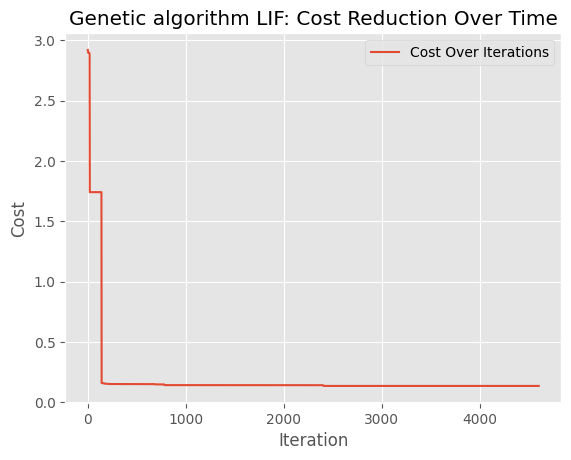

In [139]:
plt.plot(cost_history, label='Cost Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Genetic algorithm LIF: Cost Reduction Over Time')
plt.legend()
plt.show()

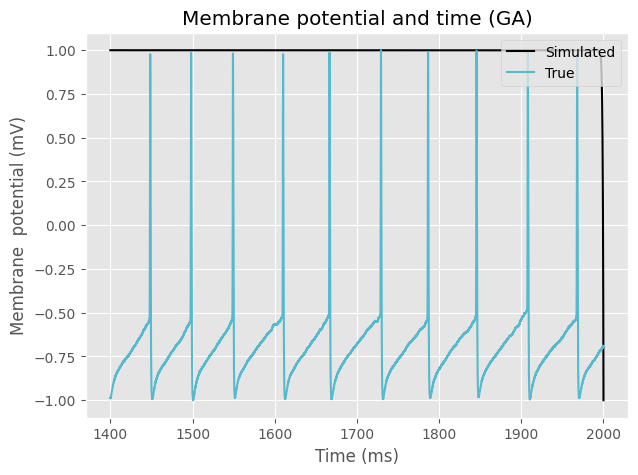

In [140]:
lif_model = LIFModel(v_0, I, optimized_params[0], optimized_params[1], optimized_params[2], v_th, v_reset, t_0)
lif_model.simulate(t_0, t_max, dt)
t = pd.Series(lif_model.history['t'])
v = pd.Series(lif_model.history['v'])
v_min=v.min()
v_max=v.max()
v=2*(v-v_min)/(v_max-v_min)-1

time=np.arange(t_0,t_max,dt)
steps=int((t_max-t_0)/dt)
timepoint=np.linspace(t_ds[0], t_ds[-1], steps)
plt.figure(figsize=(7, 5))
plt.plot(timepoint, v, color='black',label='Simulated')
plt.plot(t_ds, v_ds, color='#56B9CD',label='True')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane  potential (mV)')
plt.title('Membrane potential and time (GA)')
plt.legend(loc='upper right')
plt.show()